<a href="https://colab.research.google.com/github/sakhnos/Paper4_Plasma/blob/master/Plasma_W()_Zdv_T%26n_profiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

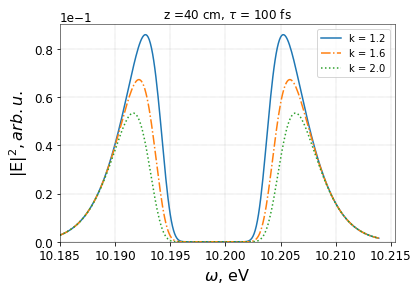

In [37]:
%reset -f 
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter  
from scipy import interpolate 

# With Lisitsa V.S. USP propagation in plasma-layer. T(z), N(z) - from Zdvizhensky, dimensional values

c = 137
aB = 0.52 * 10 ** (-8) # Bohr's radius in cm
gamma = 6.6 * 10 ** -19
M = 1828

def T(z, k): # non-uniform temperature distribution
    return (k * z + 10) / 27.2          # z[cm], T(z)[at.u.]
  
def T_vis():
    k1 = 1.2
    k2 = 1.6
    k3 = 1.8
    zz = np.arange(0, 50, 1)
    Tval1 = np.zeros(len(zz))
    Tval2 = np.zeros(len(zz))
    Tval3 = np.zeros(len(zz))
    for i in range(len(zz)): 
      Tval1[i] = T(zz[i], k1) * 27.2
      Tval2[i] = T(zz[i], k2) * 27.2
      Tval3[i] = T(zz[i], k3) * 27.2
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color
    plt.plot(zz, Tval1,'')
    plt.plot(zz, Tval2,':')
    plt.plot(zz, Tval3,'-')
    ax = plt.gca()
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlabel(r'z, cm',  {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'T, eV', {'color': 'k', 'fontsize': 16})
    #plt.title(r'$\alpha$ = ')
    #plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
    plt.legend([r"k = " + str(k1), r"k = " + str(k2), r"k = " + str(k3)], loc='best', fontsize = 10) # loc='best' 
    plt.ylim(0)
    plt.xlim(zz[0], zz[len(zz) - 1]+1)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    plt.show()
    return
#T_vis()   
  
def deriv(k): # calculation of derivation with coeff k
    zz = np.arange(-1, 52, 0.1)
    val = np.zeros(len(zz))
    for i in range(len(zz)): 
         val[i] = T(zz[i], k)
    deriv = interpolate.interp1d(zz[:len(zz)-1:], np.diff(val)/np.diff(zz), kind ='linear', copy=False, bounds_error=False, fill_value = (0, 0))   # quadratic   cubic linear  
    return deriv 

def N(z, wik, k, M):# concentration profile, we are NOT using it in Fourier
    #z - cm
    # wik - in eV !!!!!
    N_deriv = deriv(k)
    return (wik / (gamma * c)) * np.sqrt(1/(2 * M * T(z, k))) * N_deriv(z)  # / aB ** 3     # z - cm, returns - cm-3
 
def N_vis():
    k1 = 1.2
    k2 = 1.6
    k3 = 1.8
    wik = 10.199
    zz = np.arange(0, 50, 1)
    N1 = np.zeros(len(zz))
    N2 = np.zeros(len(zz))
    N3 = np.zeros(len(zz))
    for i in range(len(zz)): 
      N1[i] =  N(zz[i], wik, k1, M)
      N2[i] =  N(zz[i], wik, k2, M)
      N3[i] =  N(zz[i], wik, k3, M)
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color
    plt.plot(zz, N1,'-')
    plt.plot(zz, N2,'-.')
    plt.plot(zz, N3,':')
    ax = plt.gca()
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlabel(r'z, cm',  {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'N, cm$^{-3}$', {'color': 'k', 'fontsize': 16})
    #plt.title(r'$\alpha$ = ')
    #plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
    plt.legend([r"k = " + str(k1), r"k = " + str(k2), r"k = " + str(k3)], loc='best', fontsize = 10) # loc='best' 
    plt.ylim(0.0)
    plt.xlim(zz[0], zz[len(zz) - 1]+1)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    plt.show()
    return
#N_vis() 


def delta_wik(z, wik, k, M): # !!!
    Temp = T(z, k)
    return np.sqrt(Temp/M) * (wik / c) 
  
# zz = np.arange(0, 50, 3)
# Jval = np.zeros(len(zz))   
# for i in range(len(zz)):
#   Jval[i] = delta_wik(zz[i], 10.199/27.2, 1.6, 1828)
# plt.plot(zz, Jval * 27.2)
# plt.show()

def Doppler(w, wik, delta, M):     # at certain Z,  the sama as G()
    return  np.exp( -((w - wik) ** 2) / (2 * (delta ** 2))) / (delta * np.sqrt(2 * np.pi))    

def sigma_abs(w, wik, z, f0, k, M): 
    delta = delta_wik(z, wik, k, M) 
    #print(delta * 27.2)
    return ((2 * np.pi ** 2) / c) * f0 * Doppler(w, wik, delta, M) # Doppler() === G()

def J(ww, Zdist, wik, k, f0, M):     # (ww[at.u.], Zdist[cm], wik[at.u.], k, f0, M[at.u.], returns dimensionless val)
    zz = np.arange(0, Zdist, 0.1)
    Jval = np.zeros(len(zz))   
    #NN(z) = (wik / (gamma * c)) * np.sqrt(1/(2 * M * T(z, k))) * N_deriv
    N_deriv = deriv(k)
    #print(k)
    #print(N_deriv(4))
#     zzz = np.arange(0, 50, 0.5)
#     NNN = np.zeros(len(zzz))
#     for j in range(len(zzz)):
#       NNN[j] = (wik * 27.2 / (gamma * c)) * np.sqrt(1/(2 * M * T(zzz[j], k))) * N_deriv(zzz[j])
#     plt.plot(zzz, NNN)
#     plt.xlim(0)
#     plt.grid()
#     plt.show()
#     exit()
    for i in range(len(zz)):    
          Jval[i] = sigma_abs(ww, wik, zz[i], f0, k, M) * aB ** 2 * (wik * 27.2 / (gamma * c)) * np.sqrt(1/(2 * M * T(zz[i], k))) * N_deriv(zz[i])
    J = np.trapz(Jval, zz)   
    return J

def Four2(ww, w0, wik, Zdist, tau, k, E0, f0, M): #   at certain Z
    F = E0 ** 2 * (np.pi/2) * tau ** 2 * np.exp(-(ww - w0) ** 2 * tau ** 2 - J(ww, Zdist, wik, k, f0, M) )   
    return F

def Four2_vis():
    ww = np.arange(10.185, 10.214, 0.0001) / 27.2
    F1 = np.zeros(len(ww))   
    F2 = np.zeros(len(ww)) 
    F3 = np.zeros(len(ww)) 
    z = 40
    tau = 100
    E0 = 10 ** (-4)
    k1 = 1.2
    k2 = 1.6
    k3 = 2.0
    for i in range(len(ww)):    
        F1[i] = Four2(ww[i], 10.199/27.2, 10.199/27.2, z, tau / 0.024, k1, E0, 0.416, M)
        F2[i] = Four2(ww[i], 10.199/27.2, 10.199/27.2, z, tau / 0.024, k2, E0, 0.416, M)
        F3[i] = Four2(ww[i], 10.199/27.2, 10.199/27.2, z, tau / 0.024, k3, E0, 0.416, M)
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color
    plt.plot(ww * 27.2, F1, '') 
    plt.plot(ww * 27.2, F2, '-.') 
    plt.plot(ww * 27.2, F3, ':') 
    ax = plt.gca()
  #  ax.set_facecolor((1.0, 1.0, 1.0))    # background color 
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlabel(r'$\omega$, eV',  {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'|E|$^{2}, arb.u.$', {'color': 'k', 'fontsize': 16})
    plt.title(r'z =' + str(z) + " cm, " r'$\tau$ = ' + str(tau) + ' fs')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
    plt.legend([r"k = " + str(k1), r"k = " + str(k2), r"k = " + str(k3)], loc='best', fontsize = 10) # loc='best' 
    plt.ylim(0.0)
    #plt.xlim(ww[0], ww[len(ww)])
    plt.xlim(ww[0] * 27.2)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)   
    plt.show() 
    return   
Four2_vis() 

#%prun Vis() 


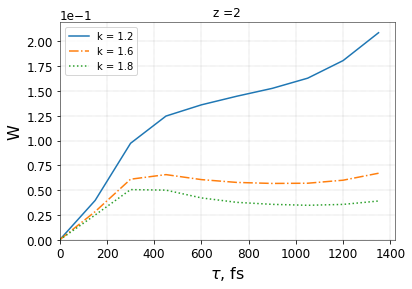

In [22]:
def W(tau, w0, wik, Zdist, k, E0, f0, M):
    a = c * E0 ** 2  * (tau/0.024) ** 2 / (8 * np.pi)
    ww = np.arange(9.0, 10.7, 0.001) / 27.2
    Wval = np.zeros(len(ww))
    for i in range(len(ww)):
         Wval[i] = sigma_abs(ww[i], wik / 27.2, Zdist, f0, k, M) * np.exp(-(ww[i] - wik/27.2) ** 2 \
                                                                          * (tau/0.024) ** 2 - J(ww[i], Zdist, wik/27.2, k, f0, M)) / ww[i]    
      # FOUR = E0 ** 2 * (np.pi/2) * tau ** 2 * np.exp(-(ww - w0) ** 2 * tau ** 2 - J(ww, Zdist, wik, k, f0, M) ) 
      # sigma = sigma_abs(ww, wik, zz[i], f0, k, M) * aB ** 2 
    return a * np.trapz(Wval, ww)      

def W_visualisation():
  w0 = 10.199
  wik = 10.199
  Zdist = 2
  k1 = 1.2
  k2 = 1.6
  k3 = 1.8
  E0 = 10 ** (-4)
  f0 = 0.416
  M = 1828
  tau = np.arange(0, 1500, 150)
  W1 = np.zeros(len(tau))
  W2 = np.zeros(len(tau))
  W3 = np.zeros(len(tau))
  for i in range(len(tau)): 
      W1[i] = W(tau[i], w0, wik, Zdist, k1, E0, f0, M) 
      W2[i] = W(tau[i], w0, wik, Zdist, k2, E0, f0, M) 
      W3[i] = W(tau[i], w0, wik, Zdist, k3, E0, f0, M)
  fig = plt.figure()
  fig.patch.set_facecolor('xkcd:white') # outer color
  plt.plot(tau, W1, '') 
  plt.plot(tau, W2, '-.') 
  plt.plot(tau, W3, ':')
  ax = plt.gca()
  ax.set_facecolor((1.0, 1.0, 1.0))    # background color 
  ax.spines['bottom'].set_linewidth(0.5)
  ax.spines['bottom'].set_color('0.0') 
  ax.spines['top'].set_linewidth(0.5)
  ax.spines['top'].set_color('0.0') 
  ax.spines['left'].set_linewidth(0.5)
  ax.spines['left'].set_color('0.0') 
  ax.spines['right'].set_linewidth(0.5)
  ax.spines['right'].set_color('0.0') 
  ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
  plt.xlabel(r'$\tau$, fs',  {'color': 'k', 'fontsize': 16})
  plt.ylabel(r'W', {'color': 'k', 'fontsize': 16})
  plt.title(r'z =' + str(Zdist) )    # + " cm, " r'$\tau$ = ' + str(tau) + ' fs'
  plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
  plt.legend([r"k = " + str(k1), r"k = " + str(k2), r"k = " + str(k3)], loc='best', fontsize = 10) # loc='best' 
  plt.ylim(0.0)
  plt.xlim(tau[0])
  ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
  for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
  for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)    
  plt.show() 
  
  
W_visualisation()   

In [0]:






                 
def Gmax(delta): # delta schitaetsa v funkzii W pri zadannom z
    return 1 / ((np.sqrt(2 * np.pi)) * delta)
             
def sigma_abs_max(delta, f0):
    return (2 * np.pi ** 2 * f0 * Gmax(delta)) / c




def Lkappa(delta, f0, N0, z, kappa, za, zb): # optical thickness L
    zz = np.arange(za, z, 0.0005)
    val = np.zeros(len(zz))
    for i in range(len(zz)): 
         val[i] = N(zz[i], kappa, za, zb, N0)    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    integral = np.trapz(val, zz)
    return sigma_abs_max(delta, f0) * (aB) ** 2 * integral 
  

  
  
def E2FourL_visualisation(): # DONE!!!!!
    beta = np.arange(-10, 10, 0.01)
    alpha = 2
    kappa1 = 0.1
    kappa2 = 0.4
    za = 0
    zb = 100
    E0 = 10 ** (-4)
    N0 = 2 * 10 ** 14  # my own profile 14
    w0 = 10.199 / 27.2 # 10.199 alfa, 12.094 - beta
    f0 = 0.416
    M = 1828
    z1 = 10  # distance
    delta_small = 0
    delta =  delta_wik(z1, w0, M)  # width of line    # at T = 10 eV width of line = 3.881 * 10 ** (-5) at.u.

    E2F_1 = E2FourL(beta, delta, alpha, kappa1, w0, za, zb, z1, E0, N0, f0, M, delta_small)          
    E2F_2 = E2FourL(beta, delta, alpha, kappa2, w0, za, zb, z1, E0, N0, f0, M, delta_small)        
    E2F_homo = E2FourL_homo(beta, delta, alpha, w0, za,     z1, E0, N0, f0, M, delta_small)
    
    sigAbs = np.zeros(len(beta))
    for i in range(len(beta)):
      sigAbs[i] =   Doppler(w0 + delta * beta[i], w0, delta, M) /  (5 * 10 ** 5)
             
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color
    plt.plot(beta, E2F_1,'-.')
    plt.plot(beta, E2F_2,'--')
    plt.plot(beta, E2F_homo,':')
    plt.plot(beta, sigAbs,'')
    ax = plt.gca()
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlabel(r'$\beta$',  {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'$|E|^2$, arb.u.', {'color': 'k', 'fontsize': 16})
    plt.title(r'$\alpha$ = ' + str(alpha) + str(", ") + "z = " + str(z1) + " cm")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
    plt.legend([r"$\varkappa$ = " + str(kappa1) + str(" см$^{-1}$, ") + r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z1, kappa1, za, zb))),
                r"$\varkappa$ = " + str(kappa2) + str(" см$^{-1}$, ") + r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z1, kappa2, za, zb))),
                r"Homogeneous, " + r'$\Lambda_h$ = ' + str(round(Lkappa_homo(delta, f0, N0, z1, za))),
               "$\sigma_{abs}/ 5 * 10^5$"], loc='lower left', fontsize = 10) # loc='best' 
    plt.ylim(0)
    plt.xlim(beta[0], beta[len(beta) - 1]+0.1)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    plt.show()
    return


def concentration_visualisation():    
    zb = 100 
    za = 0
    N0 = 2 * 10 ** 14  # my own profile 14 
    z = np.arange(0, 100, 0.1)
    F1 = np.zeros(len(z))
    F2 = np.zeros(len(z))
    F3 = np.zeros(len(z)) 
    
    kappa1 = 0.05  #0.1
    kappa2 = 0.1  #0.2
    kappa3 = 0.4  # 0.5     # N(z, kappa, z0, d, N0):# concentration profile
        
    #N(z, kappa, za, zb, N0)
    for i in range(len(z)):
        F1[i] = N(z[i], kappa1, za, zb, N0)
        
    for i in range(len(z)):
        F2[i] = N(z[i], kappa2, za, zb, N0)
        
    for i in range(len(z)):
        F3[i] = N(z[i], kappa3, za, zb, N0)
    
    
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color
    plt.plot([za, zb], [N0, N0],'-.') 
    plt.plot(z, F1,'')
    plt.plot(z, F2,'--')
    plt.plot(z, F3,':')   
    ax = plt.gca()
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlabel(r'z, cm',  {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'N(z), cm$^{-3}$', {'color': 'k', 'fontsize': 16})
 #  plt.title(r'$\alpha$ = ' + str(alpha) + str(" cm-1, ") + "z = " + str(z1) + " cm")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
    plt.legend([r"Homogeneous", r"$\varkappa$ = " + str(kappa1) + str(" см$^{-1}$, "), r"$\varkappa$ = " + str(kappa2) + str(" см$^{-1}$, "),
                r"$\varkappa$ = " + str(kappa3) + str(" см$^{-1}$")], loc='best', fontsize = 13)
    plt.ylim(0)
    plt.xlim(z[0], z[len(z) - 1]+0.1)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    plt.show()
    return

  
#concentration_visualisation() 
#LKappaVis()
E2FourL_visualisation() # spectra visualisation

In [0]:
def W(beta, alpha, delta, z, kappa, za, zb, w0, f0, E0, M, N0, delta_small):
    a = (np.pi/4) * f0 * E0 ** 2 * alpha ** 2 / (w0 * delta)
    LkappaVal = Lkappa(delta, f0, N0, z, kappa, za, zb) 
    J = np.zeros(len(beta))
    for i in range(len(beta)):
       J[i] = Doppler(w0 + delta * beta[i], w0, delta, M) * np.exp(-(beta[i] - delta_small) ** 2 * alpha ** 2 -\
                                                               LkappaVal *  Doppler(w0 + delta * beta[i], w0, delta, M) / Gmax(delta))
    integral = a * np.trapz(J, beta)
    return integral

def W_visualisation():
    alpha = np.arange(0, 5, 0.05)    # 0.05
    beta = np.linspace(-20, 20, 3000)
    print(r"integration step = " + str(beta[1]-beta[0]))
    #kappa = 0.0000000001  # 0.01
    za = 0
    zb = 100
    E0 = 10 ** (-5)
    N0 = 2 * 10 ** 14  # my own profile 14
    w0 = 10.199 / 27.2   # 10.199 alfa, 12.094 - beta
    f0 = 0.416
    M = 1828
    
    z = 10   # 2 
    zh = z # for homogenious case
    z1 = z
    z2 = z
    z3 = z
    delta = delta_wik(z, w0, M) # temperature dependent width of line
    delta_small = 3 # 3 or 5    #frequency detuning

    
    kappa1 = 0.1  # 0.05
    kappa2 = 0.3  # 0.1
    kappa3 = 0.4   # 0.2

    W1 = np.zeros(len(alpha))
    W2 = np.zeros(len(alpha))
    W3 = np.zeros(len(alpha))
    Wh = np.zeros(len(alpha))
    
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color

    for i in range(len(alpha)): # def W(beta, alpha, delta, z, kappa,      za, zb, w0, f0, E0, T, M, N0, delta_small):
        W1[i] = W(beta, alpha[i], delta, z1, kappa1, za, zb, w0, f0, E0, M, N0, delta_small)
    plt.plot(alpha, W1, '')

    for i in range(len(alpha)): # W(beta, alpha, delta, z, kappa, d, w0, f0, E0, T, M, N0):
        W2[i] = W(beta, alpha[i], delta, z2, kappa2, za, zb, w0, f0, E0, M, N0, delta_small)
    plt.plot(alpha, W2, '-.')

    for i in range(len(alpha)): # W(beta, alpha, delta, z, kappa, d, w0, f0, E0, T, M, N0):
        W3[i] = W(beta, alpha[i], delta, z3, kappa3, za, zb, w0, f0, E0, M, N0, delta_small)
    plt.plot(alpha, W3, '--')
    
    for i in range(len(alpha)): # W_homo(beta, alpha[i], delta, z, d, w0, f0, E0, T, M, N0, delta_small):
        Wh[i] = W_homo(beta, alpha[i], delta, z, za, w0, f0, E0, M, N0, delta_small)

    plt.plot(alpha, Wh, ':')

    plt.xlabel(r'$\alpha$', {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'$W$', {'color': 'k', 'fontsize': 16})
 ###   plt.title(r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z1, kappa1, d))))

    plt.legend([r"$\varkappa$ = " + str(kappa1) + str(" cm$^{-1}$, ") + r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z, kappa1, za, zb), 2)),
                r"$\varkappa$ = " + str(kappa2) + str(" cm$^{-1}$, ") + r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z, kappa2, za, zb), 2)),
                r"$\varkappa$ = " + str(kappa3) + str(" cm$^{-1}$, ") + r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z, kappa3, za, zb), 2)),
               r"Homogeneous, "+ r'$\Lambda$ = ' + str(round(Lkappa_homo(delta, f0, N0, z, za), 2)) ], loc='best', fontsize = 11)
                                                    
                                                                                               #Lkappa(delta, f0, N0, z, kappa, za, zb)
    ax = plt.gca()
    # ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlim(0, alpha[-1] + alpha[1] - alpha[0], auto = True)    # + alpha[1] - alpha[0]
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks(): 
        tick.label.set_fontsize(12)  
        #ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    plt.ylim(0)   # round(Lkappa(delta, f0, N0, z1, kappa1, d))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useOffset=False)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    plt.title("z1 = " + str(z1) + " cm, " "z2 = " + str(z2) + " cm, " + "z3 = " + str(z3) + " cm, " +  "$\delta$ = " + str(delta_small))
    plt.show()

#W_visualisation() 


0.006737946999085467
0.006737946999085467


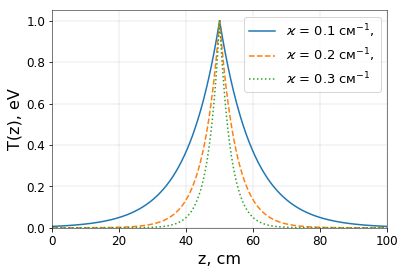

In [0]:
def T_ExpShape(z, kappa, symmetry, T0): # non-uniform temperature distribution
    if (z <= symmetry):
        return  T0 * np.exp(kappa * (z - symmetry)) # / 27.2          # z[cm], T(z)[at.u.]
    else:
        return T0 * np.exp(-kappa * (z - symmetry))  #  / 27.2  # z[cm], T(z)[at. u.]

def TExpShape_visualisation():    
    zb = 100 
    za = 0
    N0 = 2 * 10 ** 14  # my own profile 14 
    z = np.arange(0, 100, 0.1)
    F1 = np.zeros(len(z))
    F2 = np.zeros(len(z))
    F3 = np.zeros(len(z)) 
    
    kappa1 = 0.1 #0.1
    kappa2 = 0.2  #0.2
    kappa3 = 0.3  # 0.5     # N(z, kappa, z0, d, N0):# concentration profile
    
    print(T_ExpShape(za, kappa1, zb/2, 1))
    print(T_ExpShape(zb, kappa1, zb/2, 1)) 
        
    #N(z, kappa, za, zb, N0)
    for i in range(len(z)):
        F1[i] = T_ExpShape(z[i], kappa1, zb/2, 1)
        
    for i in range(len(z)):
        F2[i] =  T_ExpShape(z[i], kappa2, zb/2, 1)
        
    for i in range(len(z)):
        F3[i] = T_ExpShape(z[i], kappa3, zb/2, 1) 
    
    
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color
    #plt.plot([za, zb], [N0, N0],'-.') 
    plt.plot(z, F1,'')
    plt.plot(z, F2,'--')
    plt.plot(z, F3,':')   
    ax = plt.gca()
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlabel(r'z, cm',  {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'T(z), eV', {'color': 'k', 'fontsize': 16})
 #  plt.title(r'$\alpha$ = ' + str(alpha) + str(" cm-1, ") + "z = " + str(z1) + " cm")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
    plt.legend([r"$\varkappa$ = " + str(kappa1) + str(" см$^{-1}$, "), r"$\varkappa$ = " + str(kappa2) + str(" см$^{-1}$, "),
                r"$\varkappa$ = " + str(kappa3) + str(" см$^{-1}$")], loc='best', fontsize = 13)
    plt.ylim(0)
    plt.xlim(z[0], z[len(z) - 1]+0.1)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    plt.show()
    return
  
TExpShape_visualisation()

kappa = 0.0
T(za) = 10.0
T(zb) = 10.0
T(zb/2) = 73.89


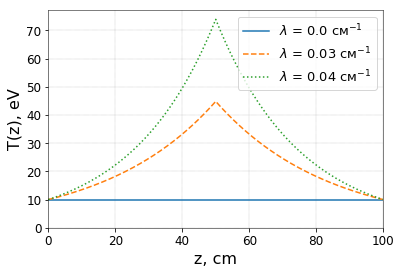

In [0]:
def T_ExpShape(z, kappa, za, zb, Ta): # non-uniform temperature distribution
    if (z <= zb/2):
        return  Ta * np.exp(kappa * (z - za)) # / 27.2          # z[cm], T(z)[at.u.]
    else:
        return Ta * np.exp(-kappa * (z - zb))  #  / 27.2  # z[cm], T(z)[at. u.]

def TExpShape_visualisation():    
    zb = 100 
    za = 0
    Ta = 10 # eV
    z = np.arange(0, 100, 0.1)
    F1 = np.zeros(len(z))
    F2 = np.zeros(len(z))
    F3 = np.zeros(len(z)) 
    
    kappa1 = 0.00 #0.1
    kappa2 = 0.03  #0.2
    kappa3 = 0.04  # 0.5     # N(z, kappa, z0, d, N0):# concentration profile
    
    print(r"kappa = " + str(kappa1))
    print(r"T(za) = " + str(T_ExpShape(za, kappa3, za, zb, Ta)) )
    print(r"T(zb) = " + str(T_ExpShape(zb, kappa3, za, zb, Ta)) )  
    print(r"T(zb/2) = " + str(round(T_ExpShape(zb/2, kappa3, za, zb, Ta), 2)))
       
    #N(z, kappa, za, zb, N0)
    for i in range(len(z)):
        F1[i] = T_ExpShape(z[i], kappa1, za, zb, Ta)
        
    for i in range(len(z)):
        F2[i] =  T_ExpShape(z[i], kappa2, za, zb, Ta)
        
    for i in range(len(z)):
        F3[i] = T_ExpShape(z[i], kappa3, za, zb, Ta) 
    
    
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color
    #plt.plot([za, zb], [N0, N0],'-.') 
    plt.plot(z, F1,'')
    plt.plot(z, F2,'--')
    plt.plot(z, F3,':')   
    ax = plt.gca()
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlabel(r'z, cm',  {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'T(z), eV', {'color': 'k', 'fontsize': 16})
 #  plt.title(r'$\alpha$ = ' + str(alpha) + str(" cm-1, ") + "z = " + str(z1) + " cm")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 4), useOffset=False)
    plt.legend([r"$\lambda$ = " + str(kappa1) + str(" см$^{-1}$"), r"$\lambda$ = " + str(kappa2) + str(" см$^{-1}$"),
                r"$\lambda$ = " + str(kappa3) + str(" см$^{-1}$")], loc='best', fontsize = 13)
    plt.ylim(0)
    plt.xlim(z[0], z[len(z) - 1]+0.1)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    plt.show()
    return
  
TExpShape_visualisation()